# Importing libraries and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,...,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,0.807268,0.862909,0.836029,0.902826,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.262724,21.044805,21.449664,20.734400,21.135345,20.868361,27.900000,6.7,6.7,6.7,6.7,6.7,6.7,6.9,748.773616,745.635196,745.722604,747.266661,...,90.538314,93.076315,140.750000,140.75,14.842528,14.623873,14.517372,14.895220,15.189313,14.620000,14.62,852.018666,881.425333,886.429668,898.527421,898.921396,866.570000,866.57,639.445923,638.551615,640.752660,642.185528,645.526717,659.850000,659.85,89.578791,89.800777,92.778518,90.116248,91.178811,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.03000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,1.304489,1.369799,1.483810,1.410581,1.36387,1.0,1.0,1.0,1.0,1.0,1.0,1.0,26.935492,26.917903,26.812166,27.046565,26.728962,26.987791,26.839536,6.5,6.5,6.5,6.5,6.5,6.5,6.5,720.968536,756.933242,752.990770,745.632089,...,83.898609,153.670976,145.443635,140.75,19.652102,20.024744,19.996483,19.700790,19.903516,19.416194,14.62,879.689212,889.134201,900.501302,884.566466,900.320700,885.922242,866.57,729.654533,730.926545,719.936333,712.491187,714.836523,718.272482,659.85,72.257239,71.495474,72.785362,72.043741,71.894269,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.96579,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,0.775300,0.891820,0.764695,0.595725,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.090036,21.859335,22.043087,22.042797,21.839760,22.125842,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,762.066151,768.275771,758.085709,772.244863,...,141.275981,138.152418,140.750000,140.75,13.887089,13.836612,13.529611,13.759351,13.324413,14.620000,14.62,875.356303,839.006498,852.927388,871.950038,860.965231,866.570000,866.57,677.952178,679.083196,681.567955,688.251044,688.935635,659.850000,659.85,87.905177,87.572528,89.312029,89.155602,87.371393,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.03000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,0.721926,0.705900,0.684055,0.713621,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.360028,28.506406,28.253319,28.475223,28.229994,28.510415,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,748.069853,752.061262,759.559203,757.753112,...,140.928006,140.131837,140.750000,140.75,14.437821,14.550981,14.341909,13.011563,18.705976,14.620000,14.62,854.515609,882.802633,888.650072,857.206054,886.532342,866.570000,866.57,654.294947,650.570921,650.475246,650.816759,649.628841,659.850000,659.85,90.841183,89.812823,87.215903,87.151549,88.782148,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.03000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,0.734769,0.604975,0.772111,0.853173,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.049664,18.901242,18.868833,20.118346,20.220839,9.598223,27.900000,6.8,6.8,6.8,6.8,6.8,6.8,6.9,760.601702,761.567663,762.897188,764.388612,...,146.092326,32.560457,140.750000,140.75,14.045790,14.047710,15.446998,4.404364,21.231364,14.620000,14.62,823.243857,866.818489,857.765989,854.047150,855.425974,866.570000,866.57,628.299988,627.161174,628.979612,639.097801,639.898539,659.850000,659.85,84.840260,85.688154,85.421206,88.835801,90.113780,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.03000,2.0

In [3]:
df.shape

(794, 387)

In [4]:
df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,...,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,794.0,794.0,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,794.000000,7.940000e+02,7.940000e+02,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,438.658690,754.919194,754.729879,754.646425,754.540917,754.424182,754.535914,752.154530,8.751822e-01,8.713170e-01,8.733573e-01,8.834765e-01,8.829216e-01,8.773801e-01,1.218192e+00,1.0,1.0,0.998741,0.994962,0.994962,0.993703,0.994962,22.551905,23.767897,2.371445e+01,2.365455e+01,23.602046,2.308791e+01,2.588559e+01,6.685957,6.686524,6.686587,6.686965,6.687091,6.686965,6.837406,739.426446,741.539902,742.141668,742.145864,...,116.430302,114.224670,133.000466,140.571505,14.838842,14.861320,14.843369,15.066385,15.318522,14.808029,14.625582,841.494491,841.153226,840.729893,841.739348,842.017951,860.158515,866.404226,661.577418,660.725393,660.366813,660.303898,660.245093,660.469657,659.815437,83.563816,84.081027,84.257042,84.157335,84.437285,86.782481,87.233572,1.931834,1.929294,1.929327,1.930606,1.918361,2.004459,2.028760,0.528841
std,254.610219,13.126818,17.596497,13.928037,13.114229,13.238951,13.424742,7.333076,3.501364e-01,3.526789e-01,3.489382e-01,3.548603e-01,3.555141e-01,3.576959e-01,2.973508e-01,0.0,0.0,0.035489,0.070843,0.070843,0.079155,0.070843,4.877896,3.194108,3.277049e+00,3.416149e+00,3.581310,4.436626e+00,4.593086e+00,0.150560,0.150476,0.150492,0.150651,0.150536,0.150483,0.128254,42.573700,39.003008,34.404166,31.528566,...,47.082719,49.054137,27.982387,4.195664,5.423656,5.350246,5.379551,5.150555,4.907263,2.771608,0.121378,91.249939,92.087826,92.226633,92.422599,92.011221,47.402181,2.573710,65.994186,65.572904,65.306159,65.268029,65.336365,33.939730,3.184125,15.633934,15.445206,15.236791,15.185860,15.449286,8.688329,1.375731,0.370322,0.416583,0.375554,0.364132,0.373211,0.184948,0.029712,0.184369
min,0.000000,694.863409,436.366425,648.518443,689.144977,682.132476,680.739213,704.677729,-1.164153e-11,-1.164153e-11,-1.164153e-11,-3.492460e-11,-2.328306e-11,-2.328306e-11,-3.492460e-11,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.224533,18.147126,-4.656613e-11,-2.328306e-11,0.000000,-2.328306e-11,-2.328306e-11,6.400000,6.400000,6.400000,6.400000,6.400000,6.400000,6.400000,401.215271,401.215271,401.215271,497.150889,...,0.000000,0.000000,0.188078,23.468588,0.006318,0.002476,0.030769,0.005495,0.005731,0.030769,13.939615,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,804.251947,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,588.229274,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,75.965148,0.135551,0.141006,0.123514,0.086733,0.032860,0.079038,1.273031,-1.660000
25%,217.250000,746.507394,746.225540,746.135900,746.381193,746.140993,746.019990,750.950000,6.932981e-01,6.88231

* mean of y2 is 0.52 whereas 50% of the dataset lies with y2 = 0.58
* the min value for y2 shows -1.66 and highest value shows 1.6. Will check the rows containing values of y2 in such extreme cases since we are assuming that the value of y2 should lie between -1 and +1
* There are only 794 rows but in the 'id' column the minimum value is 0 and max value is 881 which indicates that some value are missing - will observe the pattern among these values and conclude since in the problem statement Row numbers are important as they are sorted time-wise

In [5]:
df_test

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,...,x49_t2,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,584,738.152456,747.990517,754.681726,750.607263,754.378901,746.444051,750.950000,0.740932,0.706801,0.723154,0.723744,0.716378,0.740058,1.376000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.531013,28.256823,28.316151,28.232895,2.821085e+01,25.527715,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,750.314288,740.029072,743.596073,742.075970,...,139.852962,78.052360,140.511566,140.750000,140.75,15.530733,15.600093,16.042169,16.064495,16.050873,14.620000,14.62,855.087122,861.856605,885.925861,893.369500,885.251467,866.570000,866.57,684.129784,684.473194,677.796316,679.067686,680.896822,659.850000,659.85,87.924252,91.386511,87.684191,91.393546,90.828849,87.200000,87.2,1.964234,1.913202,1.599676,1.596884,1.480912,2.030000,2.03
1,678,750.304526,751.440356,751.625640,751.040838,749.642800,751.071232,750.950000,0.714269,0.707234,0.666824,0.673494,0.736822,0.778918,1.376000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.805719,21.368538,21.688408,21.697643,2.165667e+01,21.902278,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,732.939902,718.816436,716.652476,729.130399,...,137.746375,139.857441,96.186213,140.750000,140.75,16.553412,16.707685,16.309841,17.363410,17.336537,14.620000,14.62,886.904962,900.970138,892.653772,887.733551,847.896550,866.570000,866.57,646.015503,648.743174,649.792619,650.349636,665.107940,659.850000,659.85,88.135291,89.252321,90.075781,89.955520,90.498723,87.200000,87.2,1.631347,1.660712,1.874003,1.939651,2.044686,2.030000,2.03
2,728,778.247612,766.210592,773.076177,775.301112,776.258670,766.606237,750.950000,0.943009,0.857520,0.827927,0.850126,0.929918,0.786297,1.376000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.799581,21.730315,21.455666,21.810384,2.140364e+01,7.831283,27.900000,6.7,6.7,6.7,6.7,6.7,6.7,6.9,758.659606,769.883857,768.920043,773.176669,...,25.057233,143.919175,143.970977,140.750000,140.75,16.339534,16.234889,14.008356,13.769286,13.758843,14.620000,14.62,886.602579,885.042899,833.304651,855.937760,846.979556,866.570000,866.57,620.550728,624.247153,626.729119,629.299988,628.264240,659.850000,659.85,91.384072,91.912166,88.442404,88.431589,87.886603,87.200000,87.2,1.865880,1.778088,2.307626,2.472161,2.193177,2.030000,2.03
3,338,759.227472,758.535754,762.247934,774.868563,754.005989,757.404229,750.950000,1.035127,1.049087,1.076066,1.031095,1.017599,1.030247,1.376000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.297272,26.796315,26.847153,27.028782,2.701105e+01,27.103765,27.900000,6.6,6.6,6.6,6.6,6.6,6.6,6.9,747.475924,741.440557,740.967104,745.394099,...,127.225084,1.319278,20.357368,140.750000,140.75,13.499511,13.537267,13.965318,11.436131,16.924345,14.620000,14.62,884.302627,898.976630,915.418676,920.514648,887.560716,866.570000,866.57,692.841677,694.801674,689.087045,698.203893,701.844375,659.850000,659.85,86.014749,84.436064,84.314345,85.308653,84.867806,87.200000,87.2,1.876135,2.091196,1.835713,1.870825,1.741741,2.030000,2.03
4,570,770.473802,768.971055,770.843730,771.960856,768.813193,760.116829,750.950000,1.299968,1.374928,1.374079,1.382351,1.284384,1.369515,1.376000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.305133,20.450279,20.196557,20.420533,2.022629e+01,20.351851,27.900000,6.9,6.9,6.9,6.9,6.9,6.9,6.9,764.077975,763.753649,760.025952,760.180979,...,141.797682,139.252002,126.244026,140.750000,140.75,16.047500,15.831022,16.002220,16.050506,16.044590,14.620000,14.62,855.680275,872.193249,882.039923,886.855877,876.797866,866.570000,866.57,645.826674,647.687304,650.558850,650.322325,650.437337,659.850000,659.85,91.535944,90.324499,88.191878,91.113585,88.013675,87.200000

### Checking for null values

In [6]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Columns: 387 entries, Id to y2
dtypes: float64(386), int64(1)
memory usage: 2.3 MB


In [8]:
null_columns=df_test.columns[df_test.isnull().any()]
df_test[null_columns].isnull().sum()

Series([], dtype: float64)

#### There are no null values

# Outliers 

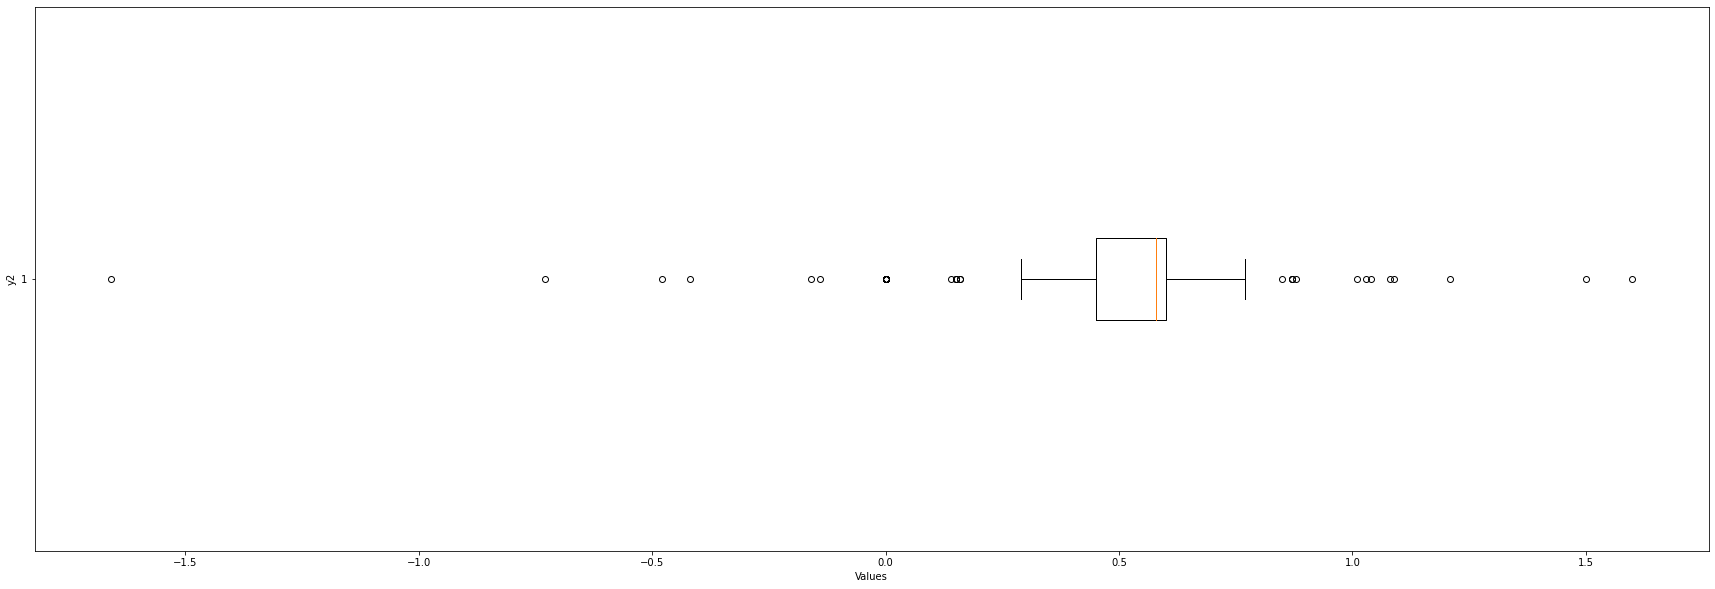

In [9]:
#boxplot
plt.figure(figsize = (30,10))
plt.boxplot(df['y2'], vert = False)
plt.ylabel('y2')
plt.xlabel('Values')
plt.show()

* It is observed that most values lies between -1 and +1. Only 1.5% of the data lies above and below these values. Therefore, we can safely remove these values from our dataset as according to our assumption that the value must lie between -1 and +1

In [10]:
#Removing rows with values beyond +1
df.drop(df[df['y2']>= 1].index, inplace = True)
df.shape

(786, 387)

In [11]:
#Removing rows having values y2 < -1
df.drop(df[df['y2']<=-1].index, inplace = True)
df.shape

(785, 387)

* in total we deleted 9 rows

## We observe that there are columns in the dataset with just 1 unique value
### We can drop these columns as they will not do any help to our model to differentiate between two different labels while on the other hand, it can even negatively affect our model by creating a bias in the data

In [12]:
#identifying the columns with just 1 unique value
dfdr = []
for col in df.columns:
    if df[col].nunique() == 1:
        dfdr.append(col)
        df.drop(col, axis = 1, inplace = True)
dfdr

['x2_t0',
 'x2_t1',
 'x18_t0',
 'x18_t1',
 'x18_t2',
 'x18_t3',
 'x18_t4',
 'x18_t5',
 'x18_t6',
 'x25_t0',
 'x25_t1',
 'x37_t6',
 'x38_t5',
 'x38_t6',
 'x42_t6']

In [13]:
#identifying the columns in the test dataframe having just 1 unique value
dtdr = []
for col in df_test.columns:
    if df_test[col].nunique() == 1:
        dtdr.append(col)
dtdr

['x2_t0',
 'x2_t1',
 'x2_t2',
 'x2_t3',
 'x2_t4',
 'x2_t5',
 'x2_t6',
 'x18_t0',
 'x18_t1',
 'x18_t2',
 'x18_t3',
 'x18_t4',
 'x18_t5',
 'x18_t6',
 'x19_t0',
 'x19_t1',
 'x19_t2',
 'x19_t3',
 'x19_t4',
 'x19_t5',
 'x19_t6',
 'x20_t0',
 'x20_t3',
 'x20_t4',
 'x20_t5',
 'x20_t6',
 'x22_t6',
 'x23_t6',
 'x24_t6',
 'x25_t0',
 'x25_t1',
 'x25_t2',
 'x25_t3',
 'x25_t4',
 'x25_t5',
 'x25_t6',
 'x26_t6',
 'x27_t6',
 'x28_t1',
 'x28_t2',
 'x28_t3',
 'x28_t4',
 'x28_t6',
 'x29_t6',
 'x30_t6',
 'x32_t6',
 'x31_t6',
 'x34_t6',
 'x33_t6',
 'x36_t6',
 'x35_t6',
 'x37_t6',
 'x38_t3',
 'x38_t4',
 'x38_t5',
 'x38_t6',
 'x39_t6',
 'x40_t6',
 'x41_t6',
 'x42_t6',
 'x43_t6',
 'x44_t6',
 'x45_t6',
 'x46_t6',
 'x47_t6',
 'x48_t6',
 'x49_t6',
 'x50_t6',
 'x51_t6',
 'x52_t6',
 'x53_t6',
 'x54_t6']

* There are more number of columns in the test data with 1 unique value than in the train data
* Columns which coincide for both datasets: x2_t0, x2_t1, x18_t0, x18_t1, x18_t2, x18_t3, x18_t4, x18_t5, x18_t6, x25_t0, x25_t1, x37_t6, x38_t5, x38_t6, x42_t6
* dropping these 15 columns from both train data and test data

In [14]:
#Dropping columns from test data
df_test.drop(dfdr, axis = 1, inplace = True)

In [15]:
#Columns which have unique values in test data but not in train data
diff = np.setdiff1d(dtdr, dfdr)
diff

array(['x19_t0', 'x19_t1', 'x19_t2', 'x19_t3', 'x19_t4', 'x19_t5',
       'x19_t6', 'x20_t0', 'x20_t3', 'x20_t4', 'x20_t5', 'x20_t6',
       'x22_t6', 'x23_t6', 'x24_t6', 'x25_t2', 'x25_t3', 'x25_t4',
       'x25_t5', 'x25_t6', 'x26_t6', 'x27_t6', 'x28_t1', 'x28_t2',
       'x28_t3', 'x28_t4', 'x28_t6', 'x29_t6', 'x2_t2', 'x2_t3', 'x2_t4',
       'x2_t5', 'x2_t6', 'x30_t6', 'x31_t6', 'x32_t6', 'x33_t6', 'x34_t6',
       'x35_t6', 'x36_t6', 'x38_t3', 'x38_t4', 'x39_t6', 'x40_t6',
       'x41_t6', 'x43_t6', 'x44_t6', 'x45_t6', 'x46_t6', 'x47_t6',
       'x48_t6', 'x49_t6', 'x50_t6', 'x51_t6', 'x52_t6', 'x53_t6',
       'x54_t6'], dtype='<U6')

* there are 57 such columns
* comparing excel sheets for the same

* check the column values in train dataset which have only 1 value in test datset
* check the number of unique values
* the rows with 3-4 unique values and the number of rows with those values
* if the number of rows is 4-5 with different values then drop the column in train and test dataset

In [16]:
#identifying the columns in train data with 2 unique value
dfdr_2 = []
for col in df.columns:
    if col in dtdr:
        if df[col].nunique() == 2:
            dfdr_2.append(col)
dfdr_2

['x2_t2',
 'x2_t3',
 'x2_t4',
 'x2_t5',
 'x2_t6',
 'x20_t0',
 'x20_t6',
 'x25_t2',
 'x25_t3',
 'x25_t4',
 'x25_t5',
 'x25_t6',
 'x28_t1',
 'x28_t2',
 'x28_t3',
 'x28_t4',
 'x28_t6',
 'x36_t6',
 'x38_t3',
 'x38_t4',
 'x45_t6']

### Checking each column with 2 unique values in dtdr for counts and dropping rows with <= 3 counts for any 1 value

In [17]:
df.shape

(785, 372)

In [18]:
df_2 = []
for col in df.columns:
    if col in dfdr_2:
        if (df[col].value_counts().any()) <= 3:
            df_2.append(col)
            df.drop(col, axis = 1, inplace = True)
print(df.shape)
print('These are the deleted columns {}'.format(df_2))

(785, 351)
These are the deleted columns ['x2_t2', 'x2_t3', 'x2_t4', 'x2_t5', 'x2_t6', 'x20_t0', 'x20_t6', 'x25_t2', 'x25_t3', 'x25_t4', 'x25_t5', 'x25_t6', 'x28_t1', 'x28_t2', 'x28_t3', 'x28_t4', 'x28_t6', 'x36_t6', 'x38_t3', 'x38_t4', 'x45_t6']


##### Total 21 columns have now been deleted from the train dataset
##### We shall now remove the same columns from the train dataset

In [19]:
for col in df_test.columns:
    if col in df_2:
        df_test.drop(col, axis = 1, inplace = True)
df_test.shape

(89, 350)

### Summarizing the data cleaning:
* Dropping rows that have values of y2 > 1 and y2 < -1
* Dropping columns from the train and test data that have only 1 unique value as that doesn't contribute to the model
* Comparing coolumns from the test data(that have only 1 unique value) in the train data columns that have 2 vlaues. Dropping the column if the 2nd value has just <=3 occurences throughout

# Data plotting

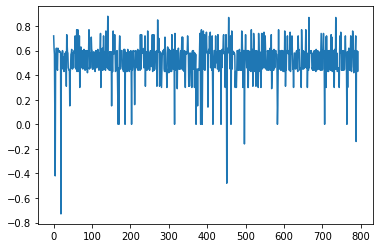

<Figure size 3600x5760 with 0 Axes>

In [20]:
df.y2.plot(kind = 'line')
plt.figure(figsize = (50,80))
plt.show()

### Splitting the train dataset(90:10)

In [21]:
x = df.drop('y2', axis = 1)
y = df['y2']

In [22]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=33)

# Building Models and Predicting

## Random Forest

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [24]:
#rf_pred = grid_rf.best_estimator_.predict(X_val)
rf_pred1 = grid_rf.best_estimator_.predict(x_test)

#rf_pred = np.exp(rf_pred)-1
#rf_pred1 = np.exp(rf_pred1)-1
print(grid_rf.best_params_)

{'n_estimators': 70, 'min_samples_split': 70, 'min_samples_leaf': 25, 'max_leaf_nodes': 28, 'max_depth': 18}


In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R2 using Random Forest Regression :",r2_score(y_test,rf_pred1))

R2 using Random Forest Regression : 0.27567490336783096


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dtree=DecisionTreeRegressor()
parameters={'min_samples_leaf':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
dtree_regressor=GridSearchCV(dtree,parameters,scoring='neg_mean_absolute_error',cv=5)
dtree_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': [1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                              1, 5, 10]},
             pre_

In [27]:
print(dtree_regressor.best_params_)
print(dtree_regressor.best_score_)
print(dtree_regressor.best_estimator_)

{'min_samples_leaf': 10}
-0.10546242522650676
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [28]:
dtree_prediction=dtree_regressor.predict(x_test)
print("R2 using Decision Tree Regression :",r2_score(y_test,dtree_prediction))

R2 using Decision Tree Regression : -0.5928401315676266


# XG Boost

In [29]:
from xgboost import XGBRegressor 
grid_xgb = XGBRegressor(n_jobs=-1,subsample = 0.7, scale_pos_weight= 5, reg_lambda= 4, n_estimators = 110, min_child_weight= 13, max_depth = 12, learning_rate= 0.1, colsample_bytree = 0.9, colsample_bynode= 0.9)
grid_xgb.fit(x_train,y_train)
#xgb_pred = grid_xgb.best_estimator_.predict(X_val)
xgb_pred1 = grid_xgb.predict(x_test)

[18:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
print("R2 using XG Boost :",r2_score(y_test,xgb_pred1))

R2 using XG Boost : 0.09439655400049096


In [31]:
XGB_prediction = grid_xgb.predict(x_train)
print("R2 using XG Boost :",r2_score(y_train,XGB_prediction))

R2 using XG Boost : 0.9502566534165261


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#Linear Regression model on the train set
lr_pred=lr.predict(x_train)
print("R2 using Logistic Regression :",r2_score(y_train,lr_pred))

R2 using Logistic Regression : 0.645904783447431


In [34]:
#Linear Regression model on the test set
lr_pred=(lr.predict(x_test))
print("R2 using Logistic Regression :",r2_score(y_test,lr_pred))

R2 using Logistic Regression : -24.642564238523384


# Ridge regression

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_absolute_error',cv=5)
ridge_regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.623e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.99441e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.22781e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.14854e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.16169e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgW

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [36]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.11807881387565189


In [37]:
ridge_prediction=ridge_regressor.predict(x_train)
print("R2 using Ridge Regression :",r2_score(y_train, ridge_prediction))

R2 using Ridge Regression : 0.5594618638967475


In [38]:
ridge_prediction=ridge_regressor.predict(x_test)
print("R2 using Ridge Regression :",r2_score(y_test, ridge_prediction))

R2 using Ridge Regression : -3.37260241789551


# Lasso Regression

In [39]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_absolute_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8739387160641998, tolerance: 0.001421555460992908
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0782690459894795, tolerance: 0.0014504039999999998
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0138993385517203, tolerance: 0.0013420162831858404
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [40]:
lasso_prediction=lasso_regressor.predict(x_train)
print("R2 using Lasso Regression :",r2_score(y_train, lasso_prediction))

R2 using Lasso Regression : 0.17893445896544236


In [41]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-0.09379903997078196


In [42]:
lasso_prediction=lasso_regressor.predict(x_test)
print("R2 using Lasso Regression :",r2_score(y_test, lasso_prediction))

R2 using Lasso Regression : -0.04905205378195854


# Elastic Regression

In [43]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002828348724251306, tolerance: 0.001421555460992908
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029645831885769525, tolerance: 0.001421555460992908
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028806281824911295, tolerance: 0.001421555460992908
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You 

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [44]:
model_prediction=model.predict(x_train)
print("R2 using Elastic Net Regression :",r2_score(y_train, model_prediction))

R2 using Elastic Net Regression : 0.29167282519216087


In [45]:
model_prediction=model.predict(x_test)
print("R2 using Elastic Net Regression :",r2_score(y_test, model_prediction))

R2 using Elastic Net Regression : -0.008707184854895855


# We notice that RandomForest gives the highest R2 score. Hence, will be used for our test dataset

# Applying the model on Test dataset

##### The modifications to the test dataset were performed along with train data hence need no modification at this stage

In [47]:
test_y_pred = grid_xgb.predict(df_test)

In [48]:
test_y_pred

array([0.6357297 , 0.47038665, 0.51286566, 0.5644676 , 0.42220655,
       0.5224121 , 0.6413617 , 0.6401815 , 0.41788137, 0.42622125,
       0.5446561 , 0.39909697, 0.36510128, 0.39538488, 0.39693686,
       0.60291785, 0.58558047, 0.6487651 , 0.51645076, 0.36912555,
       0.44033757, 0.5148543 , 0.51289546, 0.53266764, 0.44318676,
       0.46564484, 0.47333384, 0.55372256, 0.6212429 , 0.5918356 ,
       0.5437301 , 0.60053486, 0.5734542 , 0.5541303 , 0.5543427 ,
       0.5189881 , 0.63523626, 0.363805  , 0.60407007, 0.44403052,
       0.6017233 , 0.6120659 , 0.5435181 , 0.41192755, 0.64197326,
       0.34538618, 0.6979872 , 0.5908214 , 0.2968438 , 0.6061547 ,
       0.4733861 , 0.5131624 , 0.48670226, 0.520371  , 0.601972  ,
       0.6105608 , 0.3692755 , 0.6022817 , 0.51808506, 0.6366079 ,
       0.3862013 , 0.4269812 , 0.39756483, 0.6015538 , 0.4542795 ,
       0.6256727 , 0.52439016, 0.6086475 , 0.4774312 , 0.55774635,
       0.5149809 , 0.4926075 , 0.64646316, 0.49757445, 0.34911

In [49]:
submission_file = pd.DataFrame(test_y_pred,columns = ['y2'], index=df_test['Id'])

In [50]:
submission_file.head()

,y2
Id,
584,0.635730
678,0.470387
728,0.512866
338,0.564468
570,0.422207


In [51]:
submission_file.tail()

,y2
Id,
808,0.484667
283,0.586326
319,0.424365
521,0.374653
875,0.667219


In [52]:
submission_file.to_csv('submission_file.csv', index=True)